**Climate Data Analysis**


Import libraries and dataset

In [2]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/drive/MyDrive/CVIP Datasets/GlobalLandTemperaturesByState.csv")

First, let's go through our data to check the columns, the data types and the shape.

In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [4]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [5]:
df.shape

(645675, 5)

Now, let's check if there is any null values.

In [6]:
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

So, we have 25,648 null values for Average temperature and Average Temperature Uncertainty. Since we have a large dataset, let's drop the rows that has null values in it.

In [7]:
df = df.dropna(how='any', axis=0)

In [8]:
df.shape

(620027, 5)

Let's change the name of the columns to simpler, clearer and shorter name.

In [9]:
df.rename(columns={'dt':'Date',
                   'AverageTemperature':'Avg_temp',
                   'AverageTemperatureUncertainty':'confidence_interval_temp'}, inplace=True)
df.head()

,Date,Avg_temp,confidence_interval_temp,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


We are going to make the date column the index of our dataset. We have to convert first the content of this column to dateTime.Then, we convert this column into index.

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=620027, freq=None)

In [11]:
df.describe()

,Avg_temp,confidence_interval_temp
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


We can see that the minimum average temperature is -45. While the maximum average temperature is 36. The mean is around 9

Now, we are going to create a separate year column in our dataset. Since the index is a DateTime object we can extract the year from it.

In [12]:
df['Year'] = df.index.year
df.head()

,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


The year column has been added to our data frame.
Let's see now what are the minimum and maximum year that we have.

In [13]:
df.describe()

,Avg_temp,confidence_interval_temp,Year
count,620027.000000,620027.000000,620027.000000
mean,8.993111,1.287647,1902.331598
std,13.772150,1.360392,67.831393
min,-45.389000,0.036000,1743.000000
25%,-0.693000,0.316000,1851.000000
50%,11.199000,0.656000,1906.000000
75%,19.899000,1.850000,1960.000000
max,36.339000,12.646000,2013.000000


It starts from 1743 and ends in 2013. So, let's take a range from 1980 to 2013 in order to analyze the data.

In [14]:
latest_df = df.loc['1980':'2013']
latest_df.head()

,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980


**Data visualization**

Let's see the average temperature based on countries

In [15]:
latest_df[['Country','Avg_temp']].groupby(['Country']).mean().sort_values('Avg_temp')

,Avg_temp
Country,
Canada,-0.681256
Russia,2.432833
United States,11.516373
China,12.150210
Australia,18.447621
India,22.871669
Brazil,24.537580


we are going to plot a graph that represents the evolution of average temperature during the period from 1980 to 2013.

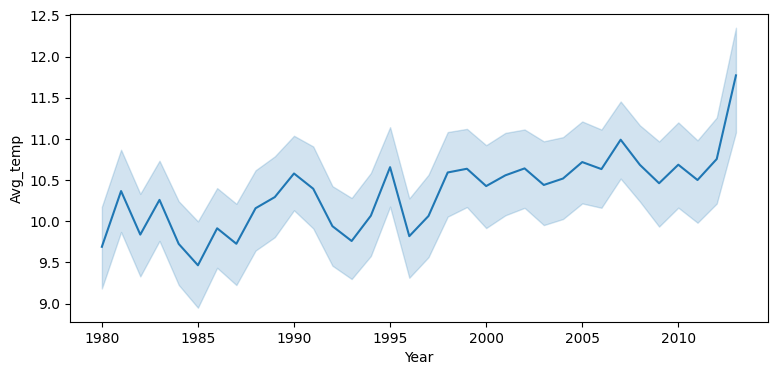

In [16]:
plt.figure(figsize=(9, 4))
sns.lineplot(x = "Year", y = "Avg_temp", data=latest_df)
plt.show()

It is clear now in the graph that the average temperature seems to be rising over the years.

Now, we are going to resample the time series to create a more sistinct line.

In [17]:
resample_df = latest_df[['Avg_temp']].resample('A').mean()
resample_df.head()

,Avg_temp
Date,
1980-12-31,9.689856
1981-12-31,10.366578
1982-12-31,9.837958
1983-12-31,10.259516
1984-12-31,9.724950


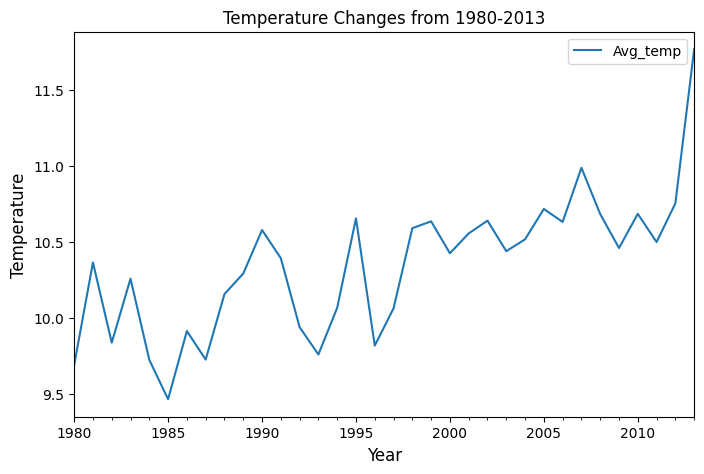

In [18]:
resample_df.plot(title='Temperature Changes from 1980-2013',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

**Stationnarity test**

Let's apply Dickey Fuller test to determine how stationary our series is . In this case, our null hypothesis will be that the time series is not stationaary and is affected by trends.

In [19]:
from statsmodels.tsa.stattools import adfuller

print('Dickey Fuller Test Results:')
test_df = adfuller(resample_df.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(test_df[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in test_df[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Dickey Fuller Test Results:
Test Statistic                 -0.728209
p-value                         0.839307
Lags Used                       2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


So, here we can see that the test statistic is greater than the critical value. We have failed to reject the null hypothesis which is "The time series data is not stationnary" At this point our time series data is not stationnary.

Now, we are going to decompose the data, extract components and then plot the original time series, the trend and the seasonal component.

Along with that, we will also plot the residual component graph.

In [20]:
decomp = seasonal_decompose(resample_df,period=3)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

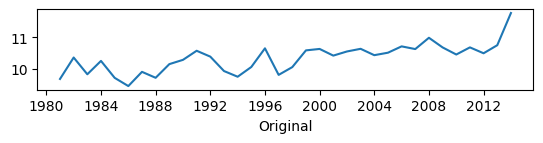

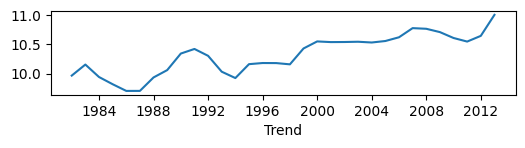

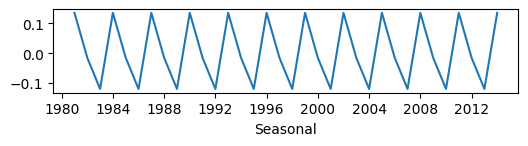

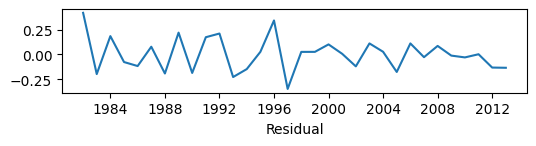

<Figure size 600x500 with 0 Axes>

In [21]:
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))

plt.tight_layout()

We have an increasing trend line in the decomposition which proves that our data currently isn't stationnary. We want the trend line to be constant over time. So, we need to transform our data.

**Data transformation**

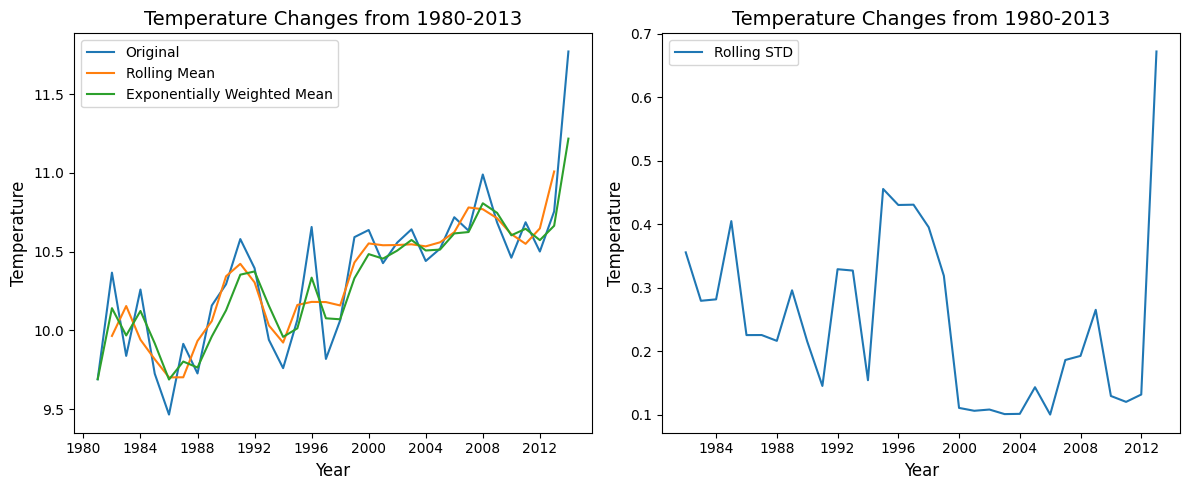

In [22]:
rol_mean = resample_df.rolling(window=3, center=True).mean()

ewm = resample_df.ewm(span=3).mean()

rol_std = resample_df.rolling(window=3, center=True) .std()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(resample_df,label='Original')
ax1.plot(rol_mean, label='Rolling Mean')
ax1.plot(ewm, label='Exponentially Weighted Mean')
ax1.set_title('Temperature Changes from 1980-2013', fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(rol_std, label='Rolling STD')
ax2.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

So, we here we can see the graph of the original, rolling mean and the exponentially weighted mean. And also we have the graph of the rolling standard deviation. Now, let's apply again the dickey fuller test.

In [23]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)

print ('Dickey-Fuller Test for the Rolling Mean:')
df_test = adfuller(rol_mean.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in df_test[4].items():
    df_output['Critical Value (%s) '%key] = value
print (df_output)
print ('')
print ('Dickey-Fuller Test for the Exponentially Weighted Mean:')
df_test = adfuller(ewm.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in df_test[4].items():
    df_output['Critical Value (%s) '%key] = value
print(df_output)

Dickey-Fuller Test for the Rolling Mean:
Test Statistic                  0.275101
p-value                         0.976173
Lags Used                       8.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64

Dickey-Fuller Test for the Exponentially Weighted Mean:
Test Statistic                 -0.338693
p-value                         0.919843
Lags Used                       2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


We can see that , again, both the test statistics are greater than the critical value. So, we have failed to reject the null hypothesis which state that the data is not stationnary. At this point, we have a non stationaary time series data.

Now, we are going to use differencing to remove the moving average or ewm from the original time series.

In [24]:
diff_rol_mean = resample_df - rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,Avg_temp
Date,
1981-12-31,0.401781
1982-12-31,-0.316726
1983-12-31,0.318708
1984-12-31,-0.091684
1985-12-31,-0.236199


In [25]:
diff_ewm = resample_df - ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,Avg_temp
Date,
1980-12-31,0.000000
1981-12-31,0.225574
1982-12-31,-0.129877
1983-12-31,0.136118
1984-12-31,-0.192797


Let's plot the difference graph with the rolling mean and the exponentially weighted mean.

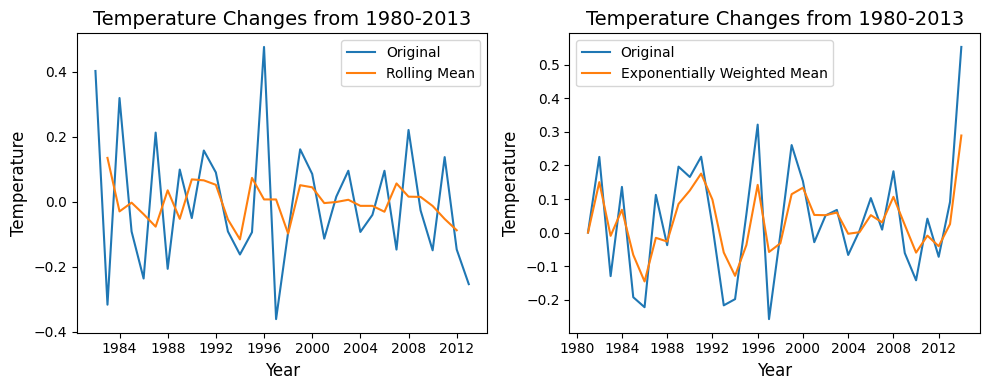

In [26]:
df_rol_mean_diff = diff_rol_mean.rolling(window=3, center=True).mean()

df_ewm_diff = diff_ewm.ewm(span=3).mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.plot(diff_rol_mean,label='Original')
ax1.plot(df_rol_mean_diff, label='Rolling Mean')
ax1.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(diff_ewm, label='Original')
ax2.plot(df_ewm_diff,label='Exponentially Weighted Mean')
ax2.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()

Now, we are going to apply the dickey fuller test and check our hypothesis.

In [27]:
print ('Dickey-Fuller Test for the Difference between the Original and Rolling Mean: ')
dftest = adfuller(diff_rol_mean.iloc[:,0].values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s) '%key] = value
print(dfoutput)
print('')
print ('Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean:')
dftest = adfuller(diff_ewm.iloc[:,0].values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s) '%key] = value
print(dfoutput)

Dickey-Fuller Test for the Difference between the Original and Rolling Mean: 
Test Statistic                -7.007710e+00
p-value                        7.051586e-10
#Lags Used                     1.000000e+00
Number of Observations Used    3.000000e+01
Critical Value (1%)           -3.669920e+00
Critical Value (5%)           -2.964071e+00
Critical Value (10%)          -2.621171e+00
dtype: float64

Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean:
Test Statistic                 -4.297446
p-value                         0.000449
#Lags Used                      1.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


So, here we can see in both cases that test statistics is less than critical value for both rolling mean and exponentially weighted mean. This indicates that we can reject the null hypothesis and we are confident that the data is now stationnary.

**Reviewing SARIMA with ACF and PACF**

We are going to review how we can find the parameters for seasonal autoregressive integrated moving average. It has parameters p, d and q which are autoregressive, integrated and moving average. So, to determine p and q parameters we are going to use autocorrestion function and partial autocorrection function.

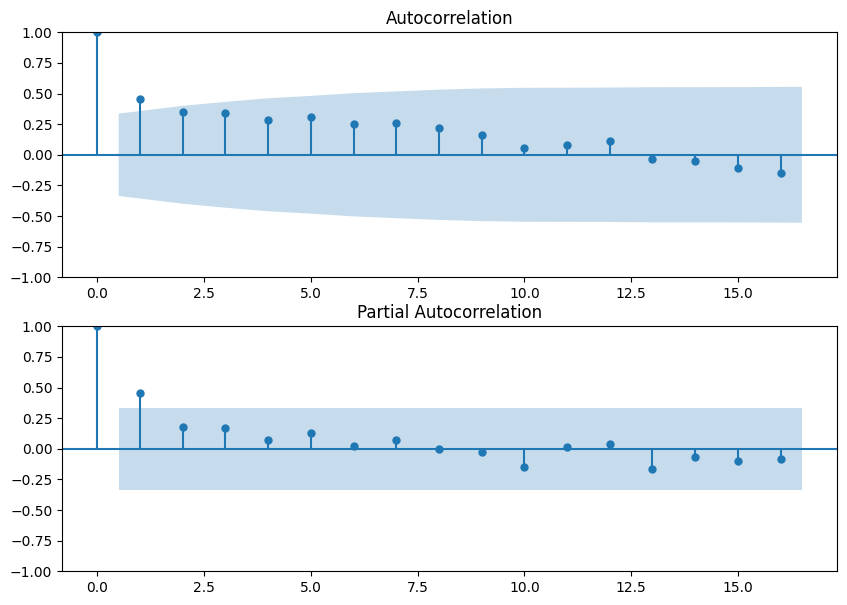

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure(figsize=(10,7))
pyplot.subplot(211)
plot_acf(resample_df, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(resample_df, ax=pyplot.gca())
pyplot.show()

So, here the p parameter will be the first value on partial autocorrection graph that is significally different from the previous values. The q parameter is the largest lag on the autocorrection plot that is significantly different from previous values. Hence, q could be 0 as there is no significant lag here. Next, the d parameter will be the number of differences taken to make the time series stationnary.